In [1]:
import os

# List everything inside /kaggle/input
print("Contents of /kaggle/input:")
print(os.listdir("/kaggle/input"))

# If you see a folder name like 'human-microbiome-project' above,
# list the files inside it:
hmp_dir = "/kaggle/input/human-microbiome-project"  # change if the folder name is slightly different
if os.path.exists(hmp_dir):
    print("\nContents of HMP directory:")
    print(os.listdir(hmp_dir))
else:
    print("\nHMP directory not found. Check os.listdir('/kaggle/input') output and adjust folder name.")


Contents of /kaggle/input:
['human-microbiome-project']

Contents of HMP directory:
['project_catalog.csv']


In [2]:
import pandas as pd

# CHANGE this filename to match exactly one of the CSV files you saw above
csv_path = os.path.join(hmp_dir, "project_catalog.csv")

df = pd.read_csv(csv_path)

print("Shape of dataframe:", df.shape)
df.head()


Shape of dataframe: (2915, 17)


,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100"
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974"
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HMP ID                   2915 non-null   int64 
 1   GOLD ID                  1783 non-null   object
 2   Organism Name            2915 non-null   object
 3   Domain                   2712 non-null   object
 4   NCBI Superkingdom        2751 non-null   object
 5   HMP Isolation Body Site  2915 non-null   object
 6   Project Status           2915 non-null   object
 7   Current Finishing Level  1579 non-null   object
 8   NCBI Submission Status   2915 non-null   object
 9   NCBI Project ID          2915 non-null   int64 
 10  Genbank ID               1579 non-null   object
 11  Gene Count               2915 non-null   int64 
 12  IMG/HMP ID               2915 non-null   int64 
 13  HOMD ID                  397 non-null    object
 14  Sequencing Center        2911 non-null  

In [4]:
import pandas as pd

# Copy original df
clean_df = df.copy()

# Columns to DROP (not useful for ML)
drop_cols = [
    "HMP ID",
    "GOLD ID",
    "NCBI Submission Status",
    "NCBI Project ID",
    "Genbank ID",
    "IMG/HMP ID",
    "HOMD ID",
    "Strain Repository ID"
]

clean_df = clean_df.drop(columns=drop_cols)

clean_df.head()


,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,Gene Count,Sequencing Center,Funding Source
0,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,1950,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement
1,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,5755,Baylor College of Medicine,NIH-HMP Jumpstart Supplement
2,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6010,Broad Institute,NIH-HMP Jumpstart Supplement
3,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,3832,Broad Institute,NIH-HMP Jumpstart Supplement
4,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,3632,Broad Institute,NIH-HMP Jumpstart Supplement


In [5]:
clean_df.isna().sum()


Organism Name                 0
Domain                      203
NCBI Superkingdom           164
HMP Isolation Body Site       0
Project Status                0
Current Finishing Level    1336
Gene Count                    0
Sequencing Center             4
Funding Source                0
dtype: int64

In [6]:
# Fill missing categorical values with "Unknown"
categorical_cols = clean_df.select_dtypes(include="object").columns
clean_df[categorical_cols] = clean_df[categorical_cols].fillna("Unknown")

# For numeric columns, fill with median
numeric_cols = clean_df.select_dtypes(include="number").columns
clean_df[numeric_cols] = clean_df[numeric_cols].fillna(clean_df[numeric_cols].median())

clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Organism Name            2915 non-null   object
 1   Domain                   2915 non-null   object
 2   NCBI Superkingdom        2915 non-null   object
 3   HMP Isolation Body Site  2915 non-null   object
 4   Project Status           2915 non-null   object
 5   Current Finishing Level  2915 non-null   object
 6   Gene Count               2915 non-null   int64 
 7   Sequencing Center        2915 non-null   object
 8   Funding Source           2915 non-null   object
dtypes: int64(1), object(8)
memory usage: 205.1+ KB


In [9]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = clean_df.select_dtypes(include='object').columns
numeric_cols = clean_df.select_dtypes(include='number').columns

categorical_cols, numeric_cols


(Index(['Organism Name', 'Domain', 'NCBI Superkingdom',
        'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level',
        'Sequencing Center', 'Funding Source'],
       dtype='object'),
 Index(['Gene Count'], dtype='object'))

In [10]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ohe_data = ohe.fit_transform(clean_df[categorical_cols])

ohe_df = pd.DataFrame(
    ohe_data,
    columns=ohe.get_feature_names_out(categorical_cols)
)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_num = scaler.fit_transform(clean_df[numeric_cols])

scaled_num_df = pd.DataFrame(
    scaled_num,
    columns=numeric_cols
)


In [12]:
pca_input_df = pd.concat([ohe_df, scaled_num_df], axis=1)
pca_input_df.shape


(2915, 2962)

PCA Head:


,PC1,PC2
0,0.695328,-0.006130
1,2.613482,-0.068203
2,2.378402,-0.200948
3,1.784240,0.119933
4,1.717542,0.126425


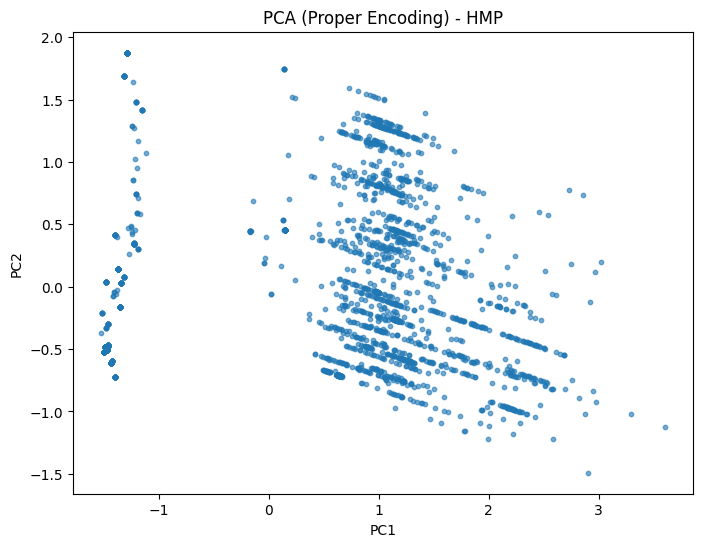

PCA with Clusters Head:


,PC1,PC2,Cluster
0,0.695328,-0.006130,0
1,2.613482,-0.068203,4
2,2.378402,-0.200948,4
3,1.784240,0.119933,4
4,1.717542,0.126425,4


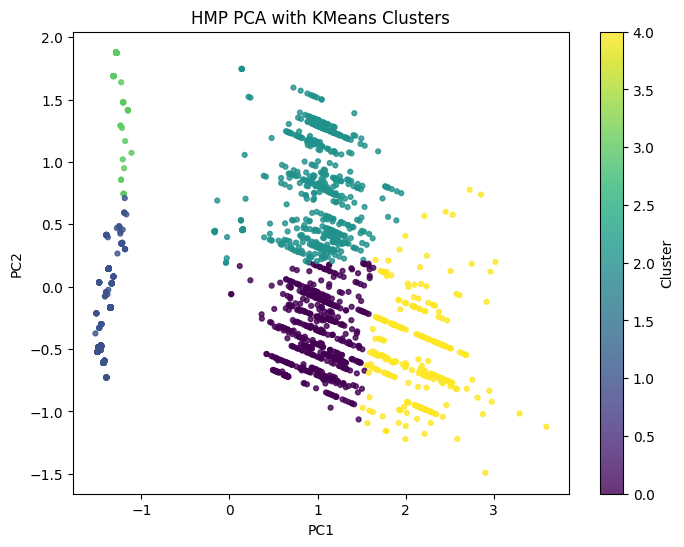

In [13]:
# --- PCA ---
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Re-run PCA cleanly
pca = PCA(n_components=2)
pca_components = pca.fit_transform(pca_input_df)

# Create PCA dataframe
pca_df = pd.DataFrame(pca_components, columns=["PC1", "PC2"])

# Show the first 5 rows (forces output)
print("PCA Head:")
display(pca_df.head())

# --- PCA Scatter Plot ---
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=10, alpha=0.6)
plt.title("PCA (Proper Encoding) - HMP")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --- KMeans ---
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_df)

# Add cluster labels
pca_df["Cluster"] = clusters

# Show updated dataframe
print("PCA with Clusters Head:")
display(pca_df.head())

# Cluster scatter plot (forces output)
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_df["PC1"], 
    pca_df["PC2"], 
    c=pca_df["Cluster"], 
    cmap='viridis', 
    s=12, 
    alpha=0.8
)
plt.title("HMP PCA with KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [14]:
# Make a copy of the clean_df (before encoding)
model_df = clean_df.copy()

# Add PCA components
model_df["PC1"] = pca_df["PC1"]
model_df["PC2"] = pca_df["PC2"]

# Add cluster label
model_df["Cluster"] = pca_df["Cluster"]

model_df.head()


,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,Gene Count,Sequencing Center,Funding Source,PC1,PC2,Cluster
0,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,1950,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,0.695328,-0.006130,0
1,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,5755,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,2.613482,-0.068203,4
2,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6010,Broad Institute,NIH-HMP Jumpstart Supplement,2.378402,-0.200948,4
3,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,3832,Broad Institute,NIH-HMP Jumpstart Supplement,1.784240,0.119933,4
4,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,3632,Broad Institute,NIH-HMP Jumpstart Supplement,1.717542,0.126425,4


In [15]:
import numpy as np

np.random.seed(42)

model_df["diet_score"] = np.random.randint(1, 11, size=len(model_df))

# mood = diet influence + bodysite influence + small microbial influence + noise
model_df["mood_score"] = (
    0.6 * model_df["diet_score"]
    + 0.2 * model_df["PC1"]
    + 0.1 * model_df["PC2"]
    + 0.3 * np.random.randn(len(model_df))
)

model_df["mood_score"] = model_df["mood_score"].round(1)

model_df.head()


,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,Gene Count,Sequencing Center,Funding Source,PC1,PC2,Cluster,diet_score,mood_score
0,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,1950,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,0.695328,-0.006130,0,7,3.9
1,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,5755,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,2.613482,-0.068203,4,4,2.8
2,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6010,Broad Institute,NIH-HMP Jumpstart Supplement,2.378402,-0.200948,4,8,5.1
3,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,3832,Broad Institute,NIH-HMP Jumpstart Supplement,1.784240,0.119933,4,5,3.3
4,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,3632,Broad Institute,NIH-HMP Jumpstart Supplement,1.717542,0.126425,4,7,4.8


In [16]:
from sklearn.preprocessing import LabelEncoder

encoded_model_df = model_df.copy()

for col in model_df.select_dtypes(include="object").columns:
    encoded_model_df[col] = LabelEncoder().fit_transform(model_df[col])

encoded_model_df.head()


,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,Gene Count,Sequencing Center,Funding Source,PC1,PC2,Cluster,diet_score,mood_score
0,0,1,1,10,0,2,1950,9,5,0.695328,-0.006130,0,7,3.9
1,6,1,1,0,0,1,5755,0,5,2.613482,-0.068203,4,4,2.8
2,13,1,1,0,0,3,6010,1,5,2.378402,-0.200948,4,8,5.1
3,20,1,1,14,0,1,3832,1,5,1.784240,0.119933,4,5,3.3
4,21,1,1,12,0,1,3632,1,5,1.717542,0.126425,4,7,4.8


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

features = [
    "Gene Count", "PC1", "PC2", "Cluster", 
    "diet_score", 
    "Domain",
    "NCBI Superkingdom",
    "HMP Isolation Body Site",
]

X = encoded_model_df[features]
y = encoded_model_df["mood_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("R²:", r2_score(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))


R²: 0.9658799399688848
RMSE: 0.33585816388334794


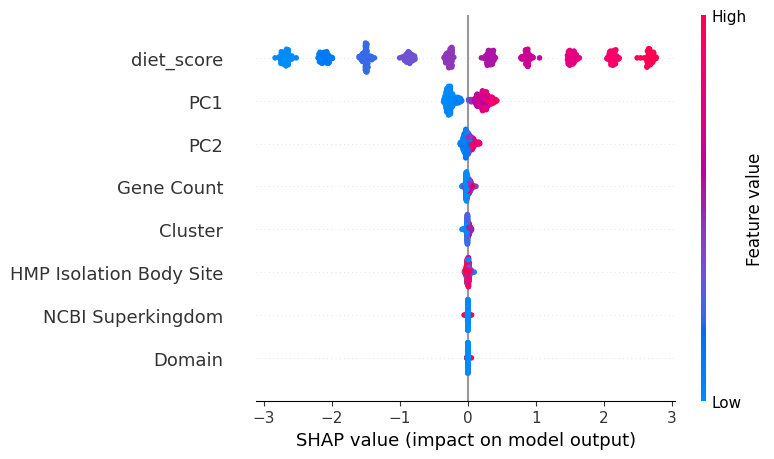

In [18]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [ ]:
model_df.to_csv("/kaggle/working/hmp_microbiome_features.csv", index=False)